# Logistic Regression and Random Forest

For this project I will be working with https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data# dataset to analyse systemic crisis in 13 African countries and using logistic regression and random forest to predict a classification of the banking crisis. These two machine learning techniques where then compared for the best performance of the model.

# Import Libraries

Let's import some libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [3]:
%matplotlib inline

# Import Dataset

We will start by importing african_crises.csv into the dataframe. You download the dataset and save it in the same direction or import directly from Kraggle

In [4]:
africa_systemic_crisis = pd.read_csv("~/Desktop/systemic_crisis/logistic_regression/african_crises.csv")
africa_systemic_crisis.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


#        # Exploratory Data Analysis

Let's have a look at the info. This will enable us know what types of variable we have and whether there is missing data

# Types of Variables

There are categorical and numerical variables. Numerical are type int and float and categorical are type object.
There are also 1059 entries with 14 columns with non-null

In [4]:
#Types of variable
africa_systemic_crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


In [32]:
#Let's see the data statistics
africa_systemic_crisis.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [37]:
# let's inspect the variable values

for var in africa_systemic_crisis.columns:
    print(var, africa_systemic_crisis[var].unique()[0:5], '\n')

case [ 1  2 10 15 19] 

cc3 ['DZA' 'AGO' 'CAF' 'CIV' 'EGY'] 

country ['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'] 

year [1870 1871 1872 1873 1874] 

systemic_crisis [1 0] 

exch_usd [0.052264 0.052798 0.052274 0.05168  0.051308] 

domestic_debt_in_default [0 1] 

sovereign_external_debt_default [0 1] 

gdp_weighted_default [0.   0.23 0.4  0.13 0.36] 

inflation_annual_cpi [ 3.4414557  14.14913958 -3.71859297 11.20389701 -3.8485607 ] 

independence [0 1] 

currency_crises [0 1 2] 

inflation_crises [0 1] 

banking_crisis ['crisis' 'no_crisis'] 



In [35]:
#To have an ideal of the label

no_columns =africa_systemic_crisis.columns
for col in no_columns:
    print('var: ', col, ' labels: ', africa_systemic_crisis[col].nunique())

print('total label: ', len(africa_systemic_crisis))

var:  case  labels:  13
var:  cc3  labels:  13
var:  country  labels:  13
var:  year  labels:  155
var:  systemic_crisis  labels:  2
var:  exch_usd  labels:  772
var:  domestic_debt_in_default  labels:  2
var:  sovereign_external_debt_default  labels:  2
var:  gdp_weighted_default  labels:  6
var:  inflation_annual_cpi  labels:  1022
var:  independence  labels:  2
var:  currency_crises  labels:  3
var:  inflation_crises  labels:  2
var:  banking_crisis  labels:  2
total label:  1059


In [5]:

# categorical variables

categorical = [var for var in africa_systemic_crisis.columns if africa_systemic_crisis[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [6]:
africa_systemic_crisis[categorical].head()

,cc3,country,banking_crisis
0,DZA,Algeria,crisis
1,DZA,Algeria,no_crisis
2,DZA,Algeria,no_crisis
3,DZA,Algeria,no_crisis
4,DZA,Algeria,no_crisis


In [7]:
# numerical variables

numerical = [var for var in africa_systemic_crisis.columns if africa_systemic_crisis[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))

There are 11 numerical variables


In [15]:
africa_systemic_crisis[numerical].head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


We can further see two types of numerical Variable - discrete and continous 

In [41]:
#Discrete
discrete = []
for var in numerical:
    if len(africa_systemic_crisis[var].unique()) < 15 and var not in africa_systemic_crisis['year']:
        discrete.append(var)
print('There are {} numerical and discrete variables in the dataset'.format(len(discrete)))

There are 8 numerical and discrete variables in the dataset


In [31]:
#continous
continuos = [var for var in numerical if var not in discrete]

print('There are {} numerical and continuous variables'.format(len(continuos)))

There are 3 numerical and continuous variables


# Missing data 

Very good. Now we have understood the types of data we are working with and have a view of the different types of variables that we are working with. Let's inspect if there are problems with these variables.
We will start by check for missing values

In [44]:
#check to see if there is any na in the dataset
africa_systemic_crisis.isna().any().any()

False

In [45]:
#check if there is any null in the dataset
africa_systemic_crisis.isnull().any().any()

False

In [46]:
#Let's confirm with the mean
africa_systemic_crisis.isna().mean()

case                               0.0
cc3                                0.0
country                            0.0
year                               0.0
systemic_crisis                    0.0
exch_usd                           0.0
domestic_debt_in_default           0.0
sovereign_external_debt_default    0.0
gdp_weighted_default               0.0
inflation_annual_cpi               0.0
independence                       0.0
currency_crises                    0.0
inflation_crises                   0.0
banking_crisis                     0.0
dtype: float64

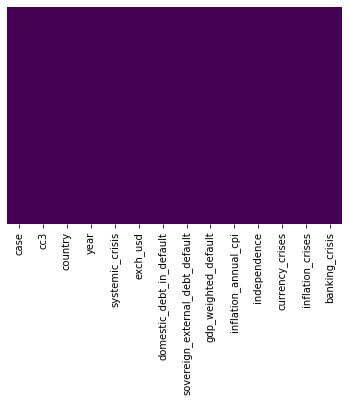

In [47]:
# We can visually see 
sns.heatmap(africa_systemic_crisis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Analysis

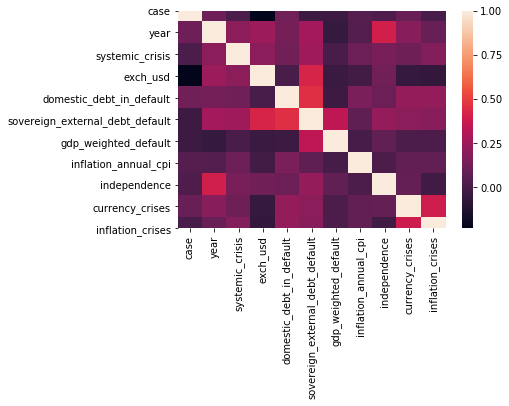

In [50]:
#see the correlation 
sns.heatmap(africa_systemic_crisis.corr())

We are going to explore to understand more about the features and to help in feature selection. Notice that case number is unique for each country and we can confirm that below.

In [51]:
#To see the count for each country
africa_systemic_crisis['country'].value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Tunisia                      75
Morocco                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [54]:
africa_systemic_crisis['cc3'].value_counts()

EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
TUN     75
MAR     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: cc3, dtype: int64

In [55]:
africa_systemic_crisis[['case','cc3','country']].head(10)

,case,cc3,country
0,1,DZA,Algeria
1,1,DZA,Algeria
2,1,DZA,Algeria
3,1,DZA,Algeria
4,1,DZA,Algeria
5,1,DZA,Algeria
6,1,DZA,Algeria
7,1,DZA,Algeria
8,1,DZA,Algeria
9,1,DZA,Algeria


In [56]:
africa_systemic_crisis[['case','cc3','country']].tail(10)

,case,cc3,country
1049,70,ZWE,Zimbabwe
1050,70,ZWE,Zimbabwe
1051,70,ZWE,Zimbabwe
1052,70,ZWE,Zimbabwe
1053,70,ZWE,Zimbabwe
1054,70,ZWE,Zimbabwe
1055,70,ZWE,Zimbabwe
1056,70,ZWE,Zimbabwe
1057,70,ZWE,Zimbabwe
1058,70,ZWE,Zimbabwe


In [67]:
print(africa_systemic_crisis['case'].unique())
print('There are {} unique numbers in case, each for one country'.format(africa_systemic_crisis['case'].nunique()))

[ 1  2 10 15 19 35 38 40 45 56 63 69 70]
There are 13 unique numbers in case, each for one country


In [68]:
africa_systemic_crisis[(africa_systemic_crisis['case'] == 70)].head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
969,70,ZWE,Zimbabwe,1921,0,4.810000e-27,0,0,0.0,-17.241379,0,0,0,no_crisis
970,70,ZWE,Zimbabwe,1922,0,4.340000e-27,0,0,0.0,-13.888889,0,0,0,no_crisis
971,70,ZWE,Zimbabwe,1923,0,4.590000e-27,0,0,0.0,-4.032258,0,0,0,no_crisis
972,70,ZWE,Zimbabwe,1927,0,4.100000e-27,0,0,0.0,0.847458,0,0,0,no_crisis
973,70,ZWE,Zimbabwe,1928,0,4.120000e-27,0,0,0.0,0.840336,0,0,0,no_crisis


In [69]:
africa_systemic_crisis[(africa_systemic_crisis['country'] == 'Nigeria')].head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
648,45,NGA,Nigeria,1954,0,0.0,0,0,0.0,3.102916,0,0,0,no_crisis
649,45,NGA,Nigeria,1955,0,0.0,0,0,0.0,6.173562,0,0,0,no_crisis
650,45,NGA,Nigeria,1956,0,0.0,0,0,0.0,6.862909,0,0,0,no_crisis
651,45,NGA,Nigeria,1957,0,0.0,0,0,0.0,1.546397,0,0,0,no_crisis
652,45,NGA,Nigeria,1958,0,0.0,0,0,0.0,-3.399990,0,0,0,no_crisis


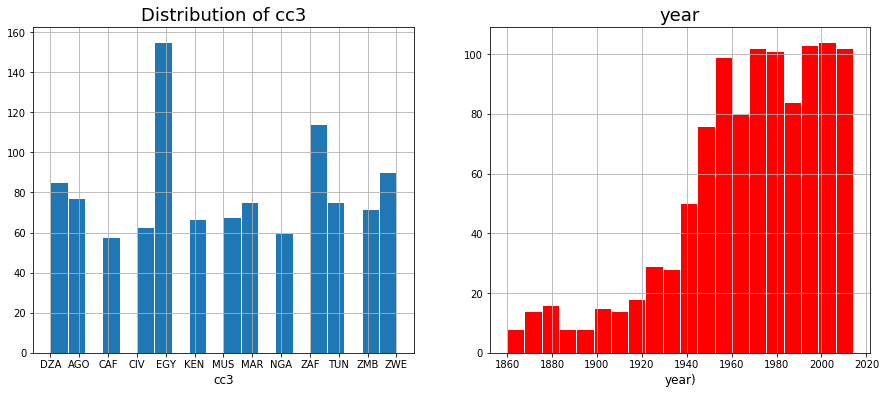

In [53]:
# Plot Distribution of Country
plt.figure(figsize=(20,3))
plt.subplot(1, 2, 1)
africa_systemic_crisis['cc3'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('cc3', fontsize=12)
plt.title('Distribution of cc3', fontsize=18)

# Plot Distribution of inflation_crises
plt.subplot(1, 2, 2)
africa_systemic_crisis['year'].hist(bins=20, figsize=(15,6), edgecolor='white', color='r')
plt.xlabel('year)', fontsize=12)
plt.title('year', fontsize=18)

plt.show()

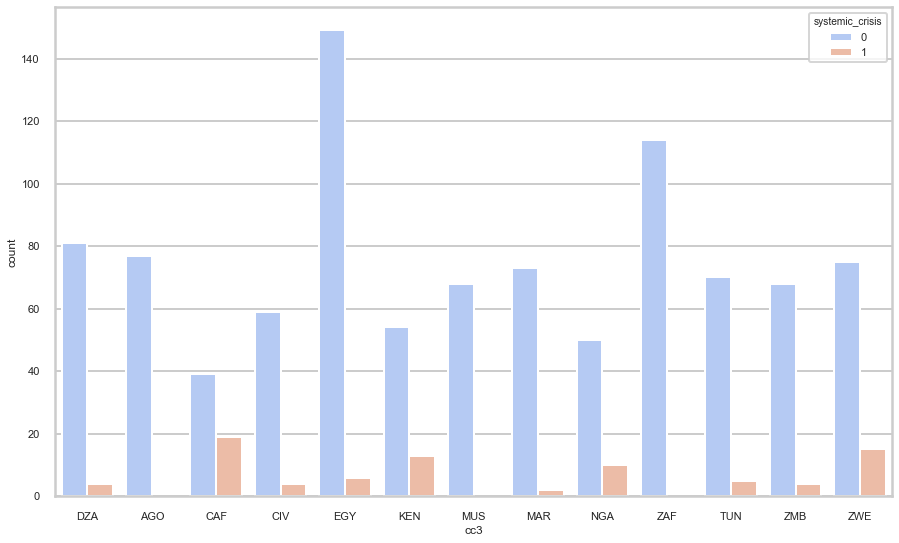

In [71]:
#Plotting cc3 with sytemic crises
plt.figure(figsize=(15,9))
sns.set_context('poster',font_scale=0.5)
sns.set_style('whitegrid')
sns.countplot(x='cc3',hue='systemic_crisis',data=africa_systemic_crisis,palette='coolwarm')

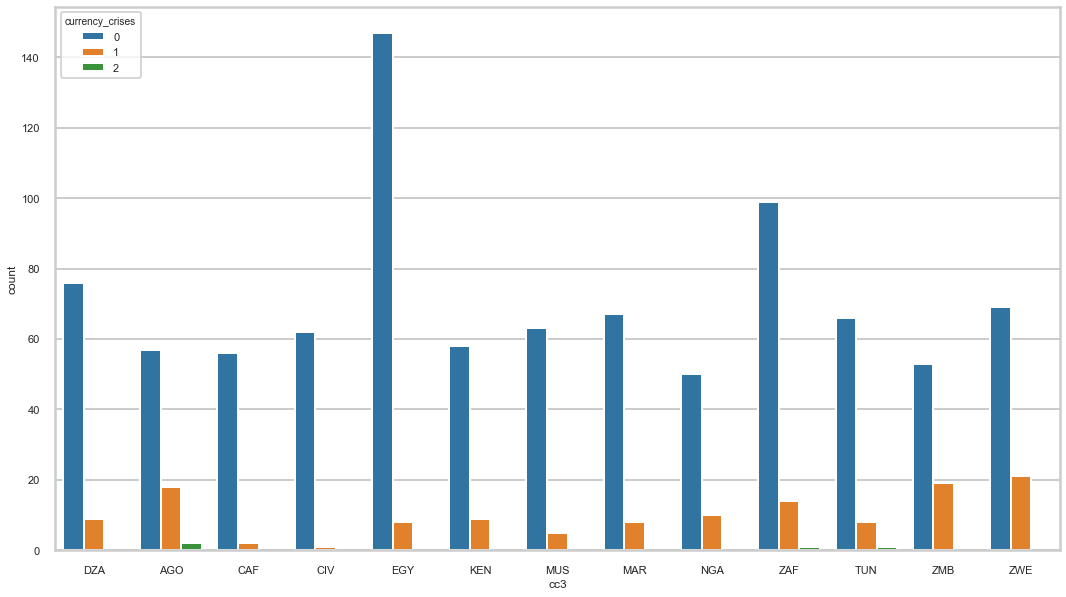

In [72]:
#Plot of cc3 with currency crises
plt.figure(figsize=(18,10))
sns.set_context('poster',font_scale=0.5)
sns.set_style('whitegrid')
sns.countplot(x='cc3',hue='currency_crises',data=africa_systemic_crisis)

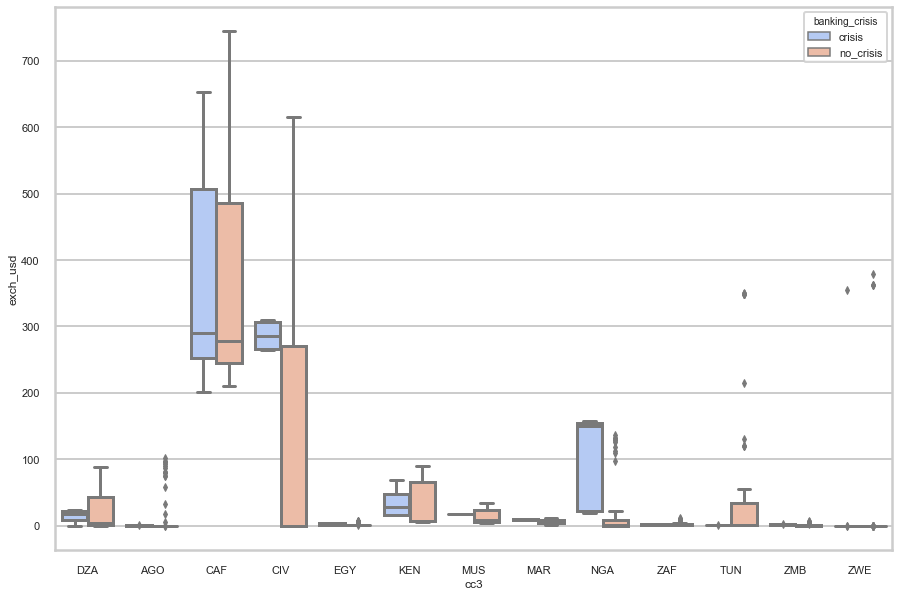

In [74]:
#Plot of cc3 with exch_usd hue with banking crisis
plt.figure(figsize=(15,10))
sns.boxplot('cc3','exch_usd',hue='banking_crisis',data=africa_systemic_crisis, palette='coolwarm')

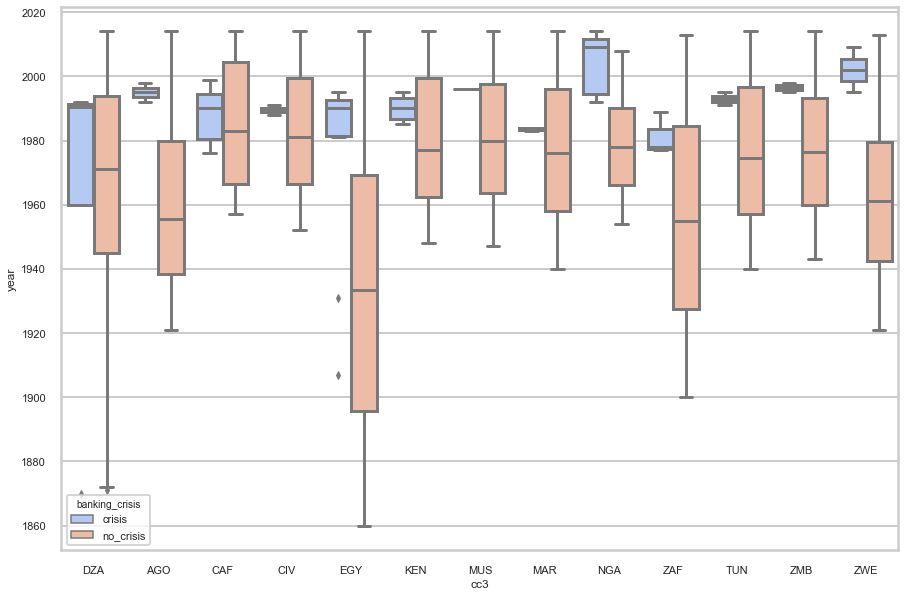

In [76]:
#Plot of cc3 with year hue with banking crisis
plt.figure(figsize=(15,10))
sns.boxplot('cc3', 'year', hue='banking_crisis',data=africa_systemic_crisis, palette='coolwarm')

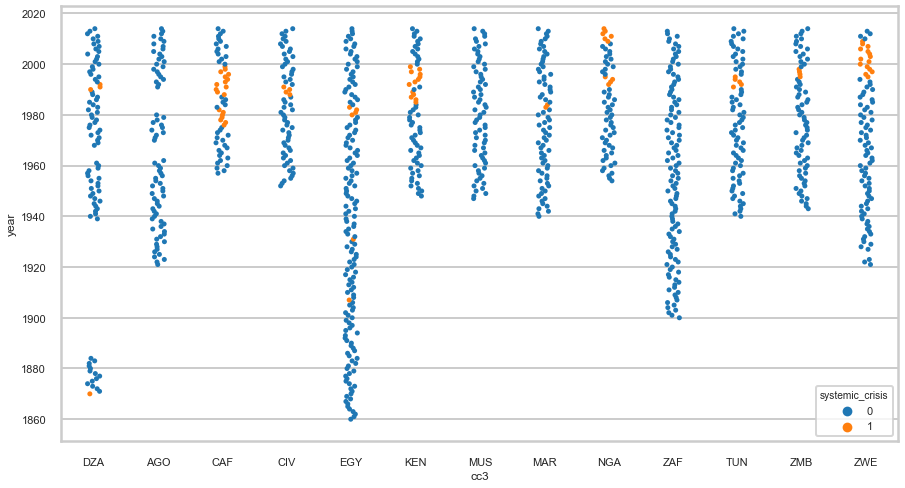

In [77]:
plt.figure(figsize=(15,8))
sns.stripplot(x="cc3", y="year", data=africa_systemic_crisis,jitter=True,hue='systemic_crisis',split = False)

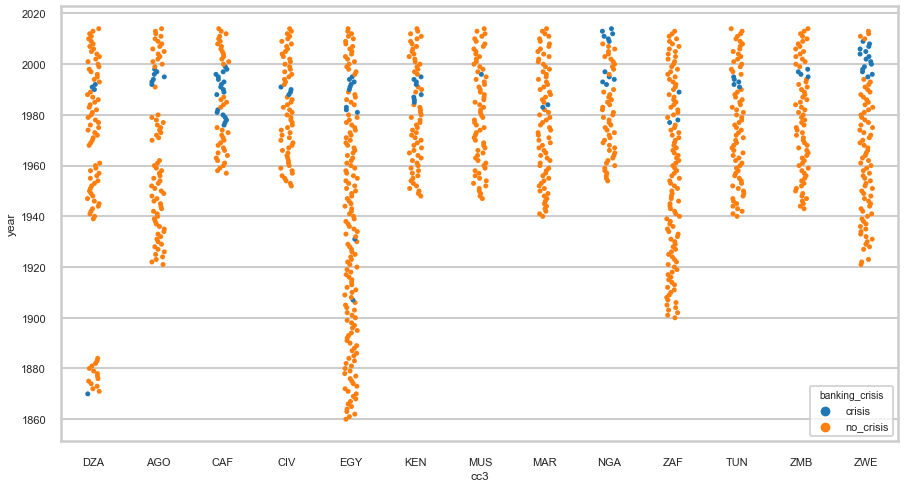

In [78]:
plt.figure(figsize=(15,8))
sns.stripplot(x="cc3", y="year", data=africa_systemic_crisis,jitter=True,hue='banking_crisis',split=False)

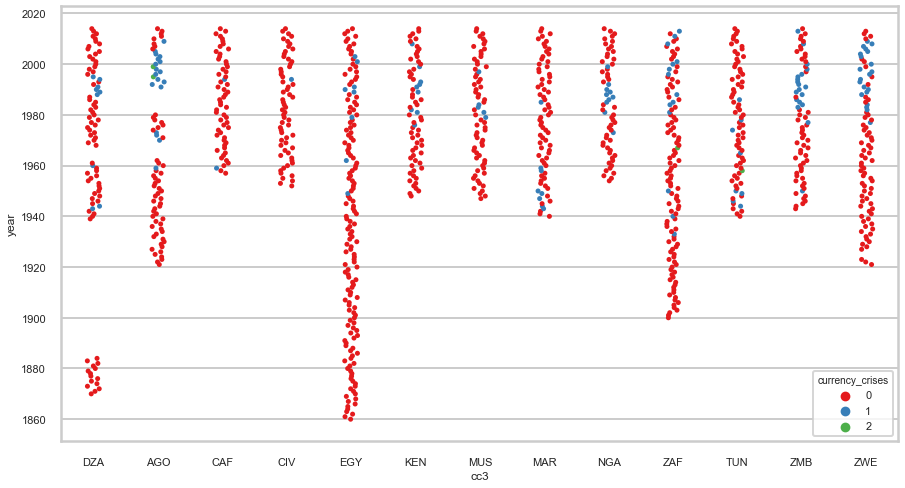

In [79]:
plt.figure(figsize=(15,8))
sns.stripplot(x="cc3", y="year", data=africa_systemic_crisis,jitter=True,hue='currency_crises',palette='Set1',split=False)

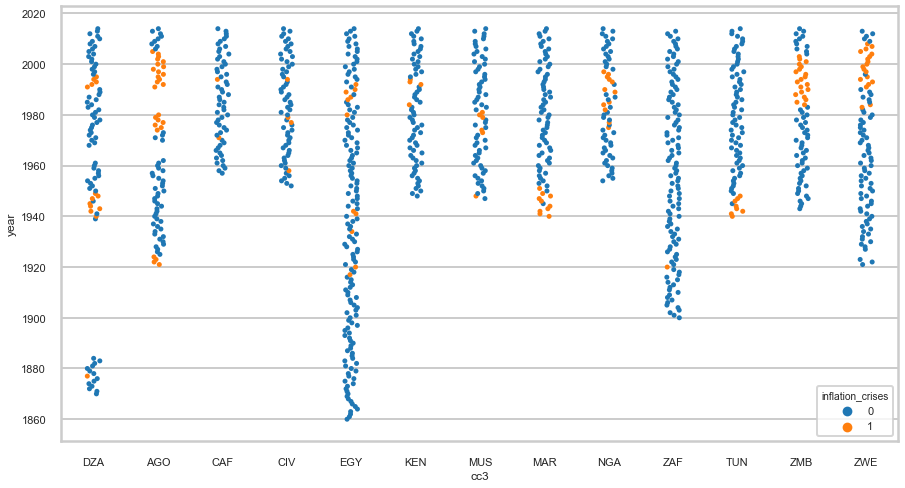

In [80]:
plt.figure(figsize=(15,8))
sns.stripplot(x="cc3", y="year", data=africa_systemic_crisis,jitter=True,hue='inflation_crises',split=False)

# One Hot Encoding

We will code the categorical variables to numerical using one hot encoding. Note, there are other encoding techniques that I tried but one hot encoding is most suitable for this project. Since case is unique for each country and cc3, we will drop both and use the case number for training. Therefore we only need to encode banking crisis

In [82]:
banking_crisis = pd.get_dummies(africa_systemic_crisis['banking_crisis'],drop_first=True)
banking_crisis.head()

,no_crisis
0,0
1,1
2,1
3,1
4,1


In [83]:
africa_systemic_crisis.drop(['cc3','country','banking_crisis'],axis=1,inplace=True)

In [84]:
africa_systemic_crisis = pd.concat([africa_systemic_crisis,banking_crisis],axis=1)
africa_systemic_crisis.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,no_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [90]:
africa_systemic_crisis.rename(columns={'no_crisis':'banking_crisis'},inplace=True)

In [92]:
africa_systemic_crisis.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


# Train model

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = africa_systemic_crisis.drop(['banking_crisis'], axis=1)
y = africa_systemic_crisis['banking_crisis']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape

((741, 11), (318, 11))

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
predictions = logistic_regression.predict(X_test)

# Evaluating the model

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        34
           1       0.98      0.99      0.99       284

    accuracy                           0.97       318
   macro avg       0.96      0.91      0.93       318
weighted avg       0.97      0.97      0.97       318



In [101]:
print(confusion_matrix(y_test,predictions))

[[ 28   6]
 [  2 282]]


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [103]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
rfc_pred = rfc.predict(X_test)

In [106]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.98      1.00      0.99       284

    accuracy                           0.98       318
   macro avg       0.97      0.92      0.95       318
weighted avg       0.98      0.98      0.98       318



In [107]:
print(confusion_matrix(y_test,rfc_pred))

[[ 29   5]
 [  1 283]]
